# Conjugate Gradients

Solve Equations of form $b = Ax$ where $A$ is positive definite. If $A$ is invertible but not positive definite the method may be applied to $A^\top A x = A^\top b$.

The objective is minimizing 
\begin{eqnarray*}
F(x) & = & \frac12 x^\top A x
\end{eqnarray*}

The conjugate gradients is an iterative method that has the following form 
\begin{eqnarray*}
x(t+1) = x(t) + \gamma(t) s(t)
\end{eqnarray*}
$\gamma(t)$ are scalar step size parameter and $s(t)$ are search directions for iteration number $t=0,1,\dots$.
Note that the gradient of $F$ is given as
\begin{eqnarray*}
\nabla F(x) \mid_{x=x(t)} \equiv g(t) = A x(t)
\end{eqnarray*}

It would be informative to contrast conjugate gradients to a gradient descent algorithm. A gradient descent algorithm 
has a very similar form 
\begin{eqnarray*}
x(t+1) &=& x(t) - \nu(t) g(t) \\ 
&=& x(t) - \nu(t) A x(t) = (I - \nu(t) A) x(t)
\end{eqnarray*}
where $\nu(t)$ is a stepsize parameter.

In the conjugate gradient method, the search directions are chosen to be mutually conjugate meaning that
\begin{eqnarray*}
s(t)^\top A s(r) = 0 \hspace{1cm} \text{when} \;\; r \neq t 
\end{eqnarray*}
Once $s(t)$ is chosen, $\gamma(t)$ has a closed form solution. 

In the sequel, we will show how to select $s(t)$ and $\gamma(t)$, but first provide an outline of the algorithm

## Conjugate vectors


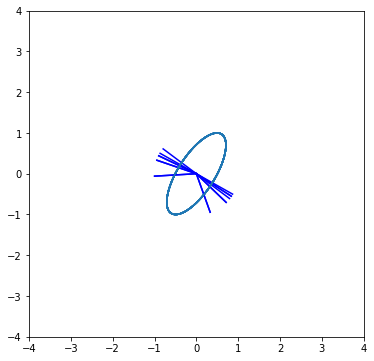

In [3]:
import numpy as np
import matplotlib.pylab as plt
from notes_utilities import pnorm_ball_points

Steps = 16
th = 2*np.pi/Steps
R = np.mat([[np.cos(th),np.sin(th)],[-np.sin(th),np.cos(th)]])

A = 0.5*np.mat([[1,0.99],[0.99, 2]])
s0 = np.mat(np.random.randn(2,1))
s0 = s0/np.linalg.norm(s0)

dx,dy = pnorm_ball_points(A=np.linalg.cholesky(A))
ln_e = plt.Line2D(dx, dy)

plt.figure(figsize=(6,6))
ax = plt.gca()

ax.set_ylim([-4,4])
ax.set_xlim([-4,4])


for i in range(Steps):
    s0 = R*s0
    g = np.mat(np.random.rand(2,1))
    c = s0.T*A*g/(s0.T*A*s0)
    s1 = -g + s0*c

    s1 = s1/np.linalg.norm(s1)

    ln1 = plt.Line2D([0,s0[0]],[0,s0[1]],color='r')
    ln2 = plt.Line2D([0,s1[0]],[0,s1[1]],color='b')

    #ax.add_line(ln1)
    ax.add_line(ln2)
    ax.add_line(ln_e)
    
plt.show()




## Illustration of the algorithm
At the first step, we select the search direction as the negative gradient
\begin{eqnarray*}
s(0) & = &  -g(0) 
\end{eqnarray*}

The search direction will be found
\begin{eqnarray*}
\gamma(0) & = & \frac{s(0)^\top g(0)}{s(0)^\top A  s(0)} = -\frac{g(0)^\top g(0)}{g(0)^\top A g(0)}\\
\end{eqnarray*}

and let 
\begin{eqnarray*}
x(1) & = & x(0) + \frac{s(0)^\top g(0)}{s(0)^\top A  s(0)} s(0)
\end{eqnarray*}

At this stage, we can calculate the new gradient as 

\begin{eqnarray*}
g(1) & = & A x(1)
\end{eqnarray*}

To execute the next step, we need to select $s(1)$ as a conjugate direction
\begin{eqnarray*}
s(0)^\top A s(1) = 0
\end{eqnarray*}

We would select the gradient $s(1) = -g(1)$, but this choice won't be necessarily a conjugate direction. A reasonable choice is choosing the new direction $s(1)$ such that we can represent the gradient as
\begin{eqnarray*}
-g(1) =  s(1) - c_0(1) s(0)
\end{eqnarray*}
where $c_0(1)$ denotes a scalar coefficient for the first search direction in computation of the gradient $g(1)$ at time $1$.

This leads to 
\begin{eqnarray*}
s(0)^\top A s(1) & = & - s(0)^\top A g(1) + c_0(1) s(0)^\top A s(0) = 0 \\
c_0(1) & = &  \frac{s(0)^\top A g(1)}{s(0)^\top A s(0)}
\end{eqnarray*}

\begin{eqnarray*}
s(1) & = & -g(1) + c_0(1) s(0)
\end{eqnarray*}

\begin{eqnarray*}
x(2) &= &x(1) + \gamma(1) s(1) \\
g(2) & = & A x(2) \\
g(2) & = & A x(1) + \gamma(1) A s(1) = g(1) + \gamma(1) A s(1) \\
\end{eqnarray*}

Similarly we want now
\begin{eqnarray*}
-g(2) =  s(2) - c_1(2) s(1) - c_0(2) s(0)
\end{eqnarray*}
where $c_1(2)$ and $c_0(2)$ denote scalar coefficients for the search direction $s(2)$ in computation of the gradient $g(2)$ at time $2$

This leads to two equations
\begin{eqnarray*}
 s(2) & = & -g(2) + c_1(2)s(1) + c_0(2) s(0) \\
 s(0)^\top A s(2) & = & -s(0)^\top A g(2) + c_1(2) s(0)^\top A s(1) + c_0(2) s(0)^\top A s(0) \\
 s(1)^\top A s(2) & = & -s(1)^\top A g(2) + c_1(2) s(1)^\top A s(1) + c_0(2) s(1)^\top A s(0) \\
\end{eqnarray*}
By conjugacy of $s(0), s(1)$ and $s(2)$ we have
\begin{eqnarray*}
 0 & = & -s(0)^\top A g(2) + c_0(2) s(0)^\top A s(0) \\
 0 & = & -s(1)^\top A g(2) + c_1(2) s(1)^\top A s(1) 
\end{eqnarray*}

\begin{eqnarray*}
 c_0(2) & = & \frac{s(0)^\top A g(2)}{s(0)^\top A s(0)} = \frac{s(0)^\top A g(2)}{s(0)^\top A s(0)}\\
 c_1(2) & = & \frac{s(1)^\top A g(2)}{s(1)^\top A s(1)} 
\end{eqnarray*}
In the general case, we will need to find scalar coefficients $c_i(t)$ for the $i$'th search direction in computation of the gradient $g(t)$ at time $t$ $i = 0\dots t-1$. In general we will have 
\begin{eqnarray*}
-g(t) & = &   s(t) - c_{t-1}(t) s(t-1) - c_{t-2}(t) s(t-2) - \dots - c_{0}(t) s(0) \\ 
& = & s(t) - \sum_{i=0}^{t-1} c_{i}(t) s(i)
\end{eqnarray*}
In other words, we require that the gradient lives in the subspace spanned by $S_t = \{ s(0), \dots, s(t)$\}, a set of mutually conjugate vectors where $s(i)^\top A s(t) = $ for $i\neq t$
We will later show that most $c_i(t)$ are in fact $0$.

## Finding the line search minimizer $\gamma(t)$

For given $x(t)$, $s(t)$ and $A$, we define $\gamma(t)$ as the line search minimizer
\begin{eqnarray*}
\gamma(t) & = & \arg\min_{\gamma}  F(x(t) + \gamma s(t) )
\end{eqnarray*}

This problem has the following solution
\begin{eqnarray*}
U(\gamma) & = & F(x(t) + \gamma s(t) ) \\
& = & \frac12 (x(t) + \gamma s(t))^\top A (x(t) + \gamma s(t)) \\
& = & \frac12 (x(t)^\top + \gamma s(t)^\top ) (A x(t) + \gamma A  s(t)) \\
& = & \frac12  x(t)^\top A x(t) + \gamma s(t)^\top A x(t) + \gamma^2 \frac12 s(t)^\top A  s(t) \\
\end{eqnarray*}

\begin{eqnarray*}
\frac{d U}{d \gamma} = s(t)^\top A x(t) + \gamma s(t)^\top A  s(t) = 0 \\
\end{eqnarray*}

\begin{eqnarray*}
\gamma(t) & = & - s(t)^\top A x(t) / s(t)^\top A  s(t) \\
& = & - s(t)^\top g(t) / s(t)^\top A  s(t) \\
\end{eqnarray*}

## Selection of the conjugate directions $s(t)$

The search directions have the following form
\begin{eqnarray*}
s(t)  & = & -g(t) + \sum_{i=0}^{t-1} c_{i}(t) s(i)
\end{eqnarray*}
In a sense, we use the current gradient and a linear combination of past search directions.
Before we derive how the coefficients $c_{i}(t)$ are found, we need some results.

The update has the form
\begin{eqnarray*}
x(t+1) & = & x(t) + \gamma(t) s(t) 
\end{eqnarray*}
This leads to the identity about the difference of two consecutive gradients
\begin{eqnarray*}
A x(t+1) &=& A x(t) + \gamma(t) A s(t)  \\
g(t+1)-g(t) & = & \gamma(t) A s(t) 
\end{eqnarray*}

### Orthogonality of $s(t)$ and $g(t+1)$

\begin{eqnarray*}
A x(t+1) &=& A x(t) + \gamma(t) A s(t)\\
g(t+1) &=& g(t) - \frac{s(t)^\top g(t)}{s(t)^\top A  s(t)}  A s(t)\\
s(t)^\top g(t+1) &=& s(t)^\top g(t) - \frac{s(t)^\top g(t)}{s(t)^\top A  s(t)} s(t)^\top A s(t) = 0 
\end{eqnarray*}

### Orthogonality of $s(i)$ and $g(t+1)$ for $i<t$

For $i<t$, if we proceed similarly,
\begin{eqnarray*}
A x(t+1) &=& A x(t) + \gamma(t) A s(t) \\
s(i)^\top g(t+1) &=& s(i)^\top g(t) + \gamma(t) s(i)^\top A s(t) \\
s(i)^\top g(t+1) &=& s(i)^\top g(t)  \\
0  &=& s(i)^\top (g(t+1) - g(t)) \\ 
\end{eqnarray*}
But actually we have a more powerful result where $ s(i)^\top  g(t+1) = s(i)^\top  g(t) = 0$. To see this, consider
the solution $x(t+1)$ at time $t+1$ as a function of a past solution at $i+1$
%\label{eq:orth2}
\begin{eqnarray*}
x(t+1) & = & x(i+1) + \sum_{k=i+1}^{t} \gamma(k) s(k) 
\end{eqnarray*}

\begin{eqnarray*}
s(i)^\top A x(t+1) & = & s(i)^\top A x(i+1) + s(i)^\top A \sum_{k=i+1}^{t} \gamma(k) s(k) \nonumber \\
s(i)^\top g(t+1) & = & s(i)^\top g(i+1) = 0 \label{eq:orth2} 
\end{eqnarray*}
Here, \ref{eq:orth2} follows from \ref{eq:orth1}

### Orthogonality of $g(i)$ and $g(t)$ for $i<t$

We have the identity
\begin{eqnarray*}
-g(i) & = &  s(i) - \sum_{j=0}^{i-1} c_j(i) s(j) 
\end{eqnarray*}

Multiply both sides by $g(t)^\top$ for some $i<t$
\begin{eqnarray*}
- g(t)^\top g(i) & = &  g(t)^\top s(i) - \sum_{j=0}^{i-1} c_j(i) g(t)^\top s(j) \\
& = & 0
\end{eqnarray*}

## Calculation of $c_i(t)$

In general, the gradient at time $t$ is given
\begin{eqnarray*}
-g(t) =  s(t) - \sum_{j=0}^{t-1} c_j(t) s(j)
\end{eqnarray*}
Multiplying both sides with $s(i)^\top A$ for some $i<t$ results in
\begin{eqnarray*}
-s(i)^\top A g(t) &=&  s(i)^\top A s(t) - \sum_{j=0}^{t-1} c_j(t) s(i)^\top A s(j) \\
-s(i)^\top A g(t) &=&  0 - c_i(t) s(i)^\top A s(i) \\
\end{eqnarray*}

This implies that  
\begin{eqnarray*}
c_i(t)  =   \frac{s(i)^\top A g(t)}{s(i)^\top A s(i)}
\end{eqnarray*}

But this coefficients can be further simplified. From (\ref{eq:diffg}) we have $g(i+1)-g(i) = \gamma(i) A s(i)$ we obtain
\begin{eqnarray*}
c_i(t)  =   \frac{(g(i+1)-g(i))^\top g(t)}{(g(i+1)-g(i))^\top s(i)}
\end{eqnarray*}

This implies that for $i<t-1$ we have

\begin{eqnarray*}
c_i(t)  =   \frac{g(i+1)^\top g(t)-g(i)^\top g(t)}{(g(i+1)-g(i))^\top s(i)} = 0
\end{eqnarray*}

For $i=t-1$ we have
\begin{eqnarray*}
c_{t-1}(t) & = &  \frac{(g(t)-g(t-1))^\top g(t)}{(g(t)-g(t-1))^\top s(t-1)} \\
 & = &  \frac{g(t)^\top g(t)}{g(t)^\top s(t-1)-g(t-1)^\top s(t-1)} \\
 & = &  \frac{g(t)^\top g(t)}{-g(t-1)^\top s(t-1)} \\
\end{eqnarray*}


This leads to the following update:

\begin{eqnarray*}
s(t) & = & -g(t) + c_{t-1}(t) s(t-1) \\
& = & -g(t) + \frac{g(t)^\top g(t)}{-g(t-1)^\top s(t-1)} s(t-1) 
\end{eqnarray*}

This udate can be further simplified. Consider, the update for the previous time step
\begin{eqnarray*}
s(t-1) & = & -g(t-1) + c_{t-2}(t-1) s(t-2) 
\end{eqnarray*}
We have
\begin{eqnarray*}
-g(t-1)^\top s(t-1) &=& g(t-1)^\top g(t-1) - c_{t-2}(t-1) g(t-1)^\top s(t-2) \\
& =& g(t-1)^\top g(t-1) \\
c_{t-1}(t) &=& \frac{g(t)^\top g(t)}{g(t-1)^\top g(t-1)}
\end{eqnarray*}

So the search direction has the simple expression in terms of the gradients
\begin{eqnarray*}
s(t) & = & -g(t) + \frac{g(t)^\top g(t)}{g(t-1)^\top g(t-1)} s(t-1) 
\end{eqnarray*}

## The Algorithm
In general, we wish to solve $Ax = b$


Select $x_0$

For $t=0,1,\dots$

\begin{eqnarray*}
g(t) & = & A x(t) - b
\end{eqnarray*}

\begin{eqnarray*}
c_{t-1}(t) & = & \frac{g(t)^\top g(t)}{g(t-1)^\top g(t-1)}\\
s(t) & = & -g(t) + c_{t-1}(t) s(t-1)
\end{eqnarray*}

\begin{eqnarray*}
\gamma(t) & = & - s(t)^\top g(t) / s(t)^\top A  s(t) 
\end{eqnarray*}

\begin{eqnarray*}
x(t+1) & = & x(t) + \gamma(t) s(t)  
\end{eqnarray*}

In [5]:
import numpy as np
np.set_printoptions(precision=5)
# Generate a random problem
N = 30

A = np.matrix(np.random.randn(N,5))
A = A*A.T + 0.01*np.eye(N)
b = np.matrix(np.random.randn(N,1))

#x_true = A\b;
x_true = np.linalg.solve(A,b)

print(np.c_[A*x_true,b])

[[ 2.93636  2.93636]
 [-0.6853  -0.6853 ]
 [ 0.13897  0.13897]
 [ 0.91148  0.91148]
 [-0.68442 -0.68442]
 [-0.43638 -0.43638]
 [-0.09231 -0.09231]
 [ 2.30362  2.30362]
 [-0.2176  -0.2176 ]
 [-0.11201 -0.11201]
 [-1.3676  -1.3676 ]
 [ 1.17789  1.17789]
 [ 2.03672  2.03672]
 [ 1.6833   1.6833 ]
 [-0.57677 -0.57677]
 [ 1.30985  1.30985]
 [ 1.06556  1.06556]
 [ 0.29659  0.29659]
 [-1.74141 -1.74141]
 [-0.08749 -0.08749]
 [-0.36454 -0.36454]
 [-0.39243 -0.39243]
 [ 1.24728  1.24728]
 [-0.01562 -0.01562]
 [-0.30972 -0.30972]
 [ 0.41243  0.41243]
 [ 0.33575  0.33575]
 [ 1.4499   1.4499 ]
 [ 0.21102  0.21102]
 [-2.11933 -2.11933]]


In [6]:
np.set_printoptions(precision=3)
# Conjugate Gradients

# random start
x = np.random.randn(N,1)
s_past = np.zeros((N,1))
gt_g_past = 1 # avoid NaN

for t in range(N-1):
    # Gradient
    g = A*x - b;
    
    # Search direction
    gt_g = g.T*g
    c = gt_g/gt_g_past
    s = -g + s_past*c
    
    # Stepsize
    gam = - s.T*g/(s.T*A*s)
    
    # Update
    x = x + s*gam
    
    print(np.c_[x, x_true])
    print(10*'*')
    s_past = s
    gt_g_past = gt_g


[[  5.160e-01   2.787e+02]
 [ -1.073e+00  -9.204e+01]
 [  1.030e-01  -1.256e+01]
 [ -4.021e-01   1.087e+02]
 [ -1.087e+00  -1.011e+02]
 [  9.333e-01  -2.158e+01]
 [ -9.155e-01  -3.415e+00]
 [  1.305e+00   2.503e+02]
 [  1.011e+00  -8.641e+00]
 [  5.113e-01  -7.891e+00]
 [  8.116e-01  -1.136e+02]
 [  1.554e-02   1.338e+02]
 [  9.901e-01   1.511e+02]
 [  1.222e-01   1.401e+02]
 [ -1.266e-04  -1.785e+01]
 [ -6.088e-01   1.264e+02]
 [  1.065e+00   1.119e+02]
 [ -1.526e-01   4.643e+01]
 [ -3.978e-01  -1.934e+02]
 [ -2.106e-01  -1.249e+01]
 [  4.087e-01  -3.720e+01]
 [ -5.433e-01  -4.225e+01]
 [  8.378e-02   8.598e+01]
 [ -6.597e-01   2.667e+01]
 [ -2.555e-01  -1.354e+01]
 [  1.528e-01   3.570e+01]
 [ -7.738e-01   9.024e+01]
 [  2.079e-01   1.513e+02]
 [ -2.931e-01   2.543e+01]
 [  1.280e-01  -1.982e+02]]
**********
[[  7.129e-01   2.787e+02]
 [ -1.080e+00  -9.204e+01]
 [  8.048e-02  -1.256e+01]
 [ -2.951e-01   1.087e+02]
 [ -1.137e+00  -1.011e+02]
 [  7.933e-01  -2.158e+01]
 [ -1.041e+00  -